# 2時間目

# 画像フィルタを設計してみよう

次に2次元（以上）の畳み込みを考えてみましょう．がぞうは x 軸とy軸の座標上に値（画素値）を持った（色を塗った）ものです．
計算機で画像を扱う場合は，これを離散化したものを考えます．すると，画像は，2次元の配列で取り扱うことができるようになります．

原理的には1時間目に行った1次元の畳み込みが，2次元になるだけです．
ただし，得られる出力は画像になりますので，いろいろな効果が見えてきます．


In [1]:
# まずはおまじないから

import numpy as np
import matplotlib.pylab as plt
from scipy.ndimage import convolve1d, convolve

In [4]:
# 画像データの読み込み
img = plt.imread('Image/Cameraman.png')

画像の大きさ
(256, 256)


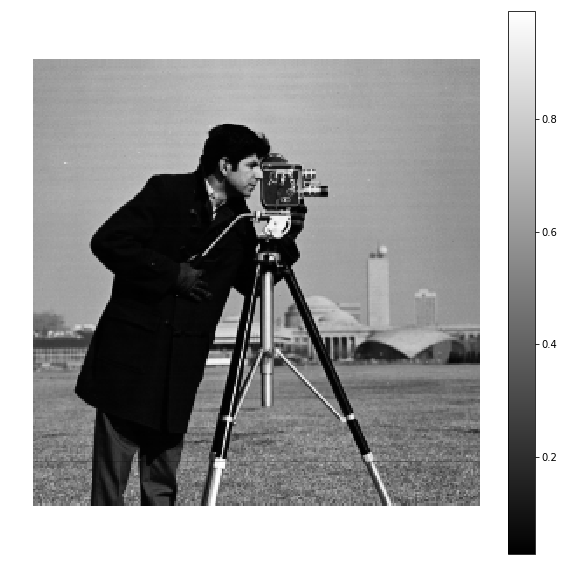

In [5]:
# よみこんだら，とりあえず表示してみましょう ← 確認することが重要です

plt.figure(figsize=(10,10))
plt.imshow(img, 'gray')
plt.axis('off')
plt.colorbar()
# この画像は　'cameraman' と呼ばれる画像です．
print("画像の大きさ")
print(img.shape)

## 微分型フィルタの設計

まずは，側抑制に代表される微分型のフィルタを設計してみます．　
１時間目は一つの軸方向でしたが，画像は x 軸と y 軸という２つの軸があるので２次元の配列の上に設計します

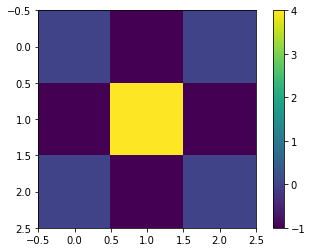

In [4]:
# １次元では　[-1, 2, -1] のような形でしたが，それを，縦横方向に積み重ねた感じになります．

h1 = np.array([[ 0, -1, 0],
                          [-1,  4, -1],
                          [ 0, -1,  0]])

# つくったら表示してみましょう．
plt.imshow(h1)
plt.colorbar()

In [5]:
# それでは畳み込み演算をしてみましょう

y1 = convolve(img, h1)

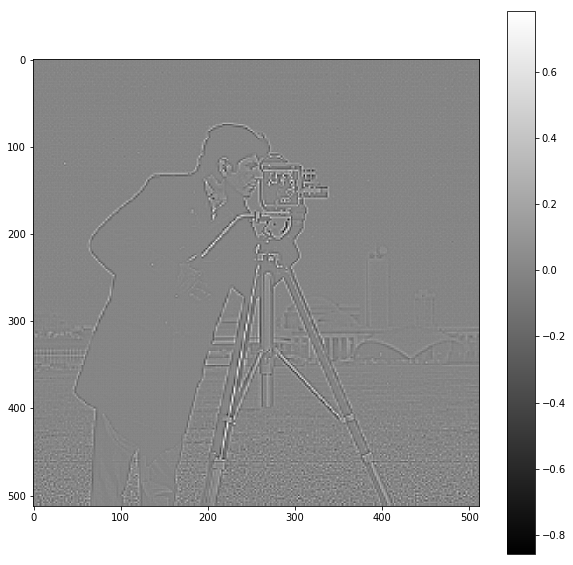

In [6]:
# 演算が終わったら表示しましょう

plt.figure(figsize=(10, 10))
plt.imshow(y1, cmap='gray')
plt.colorbar()

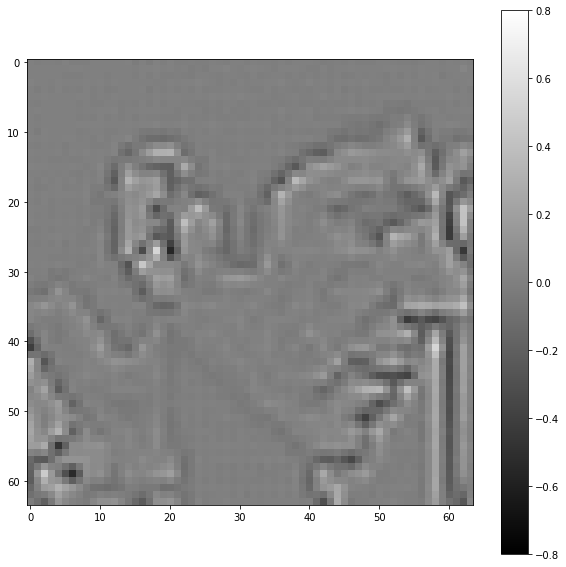

In [7]:
# 顔の部分 (100, 200)-(164, 264) の 64x64 画素を，ちょっと拡大してみましょう

plt.figure(figsize=(10, 10))
plt.imshow(y1[100:164, 200:264], cmap='gray', interpolation='Nearest', vmin=-0.8, vmax=0.8)
plt.colorbar()

# 他の場所も観測してみよう

## 部分積分型フィルタを適用してみよう

次は（局所）積分形フィルタです．
このフィルタは，空間的な画素の平均値を計算します．つまり周辺画素の性質を取り入れた形の画像処理になります．
効果としてはぼかしたような画像が得られます

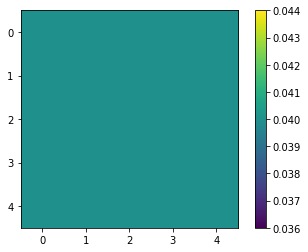

In [8]:
# 積分形のフィルタ
# 大きさを 5x5 で作ってみる

h2 = 1/25 * np.array([[1, 1, 1, 1, 1],
                                    [1, 1, 1, 1, 1],
                                    [1, 1, 1, 1, 1],
                                    [1, 1, 1, 1, 1],
                                    [1, 1, 1, 1, 1]])

# 表示してみてもそれほど面白くはないですが，確認は重要です．

plt.imshow(h2)
plt.colorbar()

In [9]:
# 畳み込みを計算します．

y2 = convolve(img, h2)

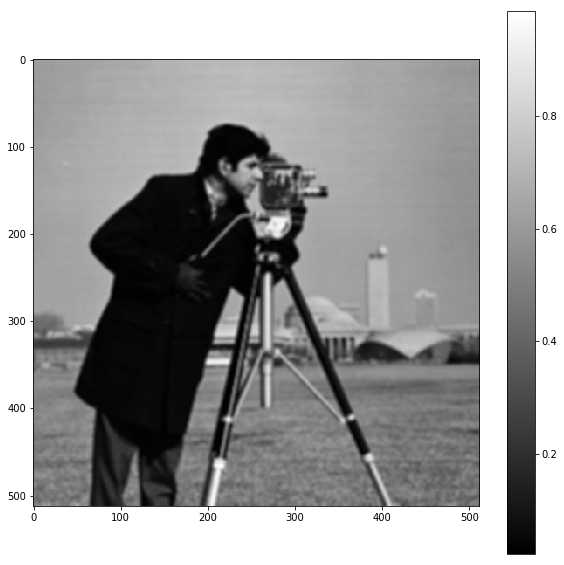

In [10]:
# 演算が終わったら表示しましょう

plt.figure(figsize=(10, 10))
plt.imshow(y２, cmap='gray')
plt.colorbar()

Text(0.5,1,'Filtered')

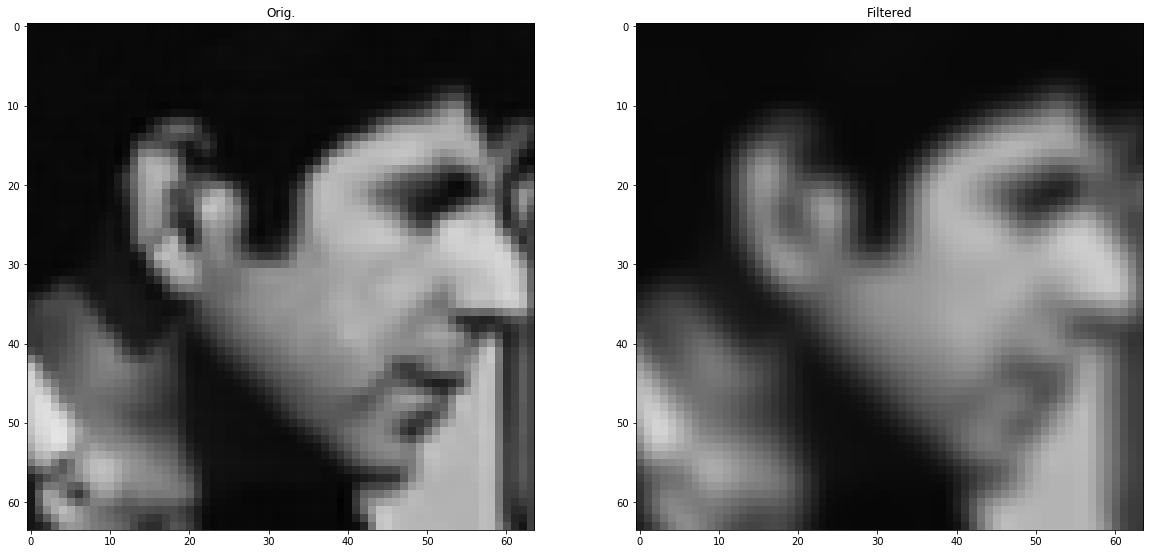

In [11]:
# 多分あまり違いがわからないので，オリジナルの拡大図とフィルタを掛けた拡大図を表示してみます．

plt.figure(figsize=(20, 40))

plt.subplot(1, 2, 1)
plt.imshow(img[100:164, 200:264], cmap='gray', interpolation='Nearest', vmin=0, vmax=1)
plt.title('Orig.')

plt.subplot(1, 2, 2)
plt.imshow(y2[100:164, 200:264], cmap='gray', interpolation='Nearest', vmin=0, vmax=1)
plt.title('Filtered')


## Hermann 格子にフィルタを適用してみる

Hermann 格子は錯視図形の一種です．四角のブロックを格子状に並べると四角と通路の画像ができあがります．
この画像の中心付近を観ていると通路と通路の交差点部分が暗く見えてきます（物理的な明るさは通路の色と一緒です）

(-0.5, 572.5, 563.5, -0.5)

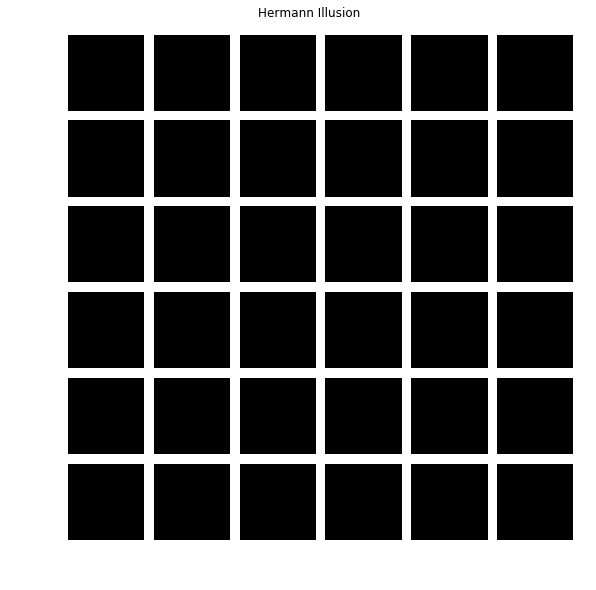

In [12]:
# 画像データの読み込み
# 画像データは Misc フォルダにあります
himg = plt.imread('Misc/Herman.png')

plt.figure(figsize=(10, 10))
plt.imshow(himg, cmap='gray')
plt.title('Hermann Illusion')
plt.axis('off')

この画像は，側抑制やぼかしを行うフィルタで，説明できるかどうかを試してみましょう．
まず，側抑制型のフィルタをかけてみます．

(-0.5, 572.5, 563.5, -0.5)

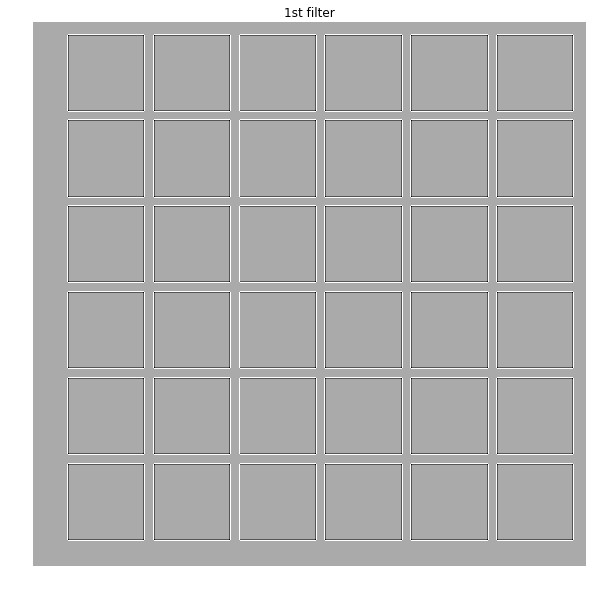

In [13]:
hout1 = convolve(himg, h1)

plt.figure(figsize=(10, 10))
plt.imshow(hout1, cmap='gray')
plt.title('1st filter')
plt.axis('off')

Text(0.5,1,'2nd')

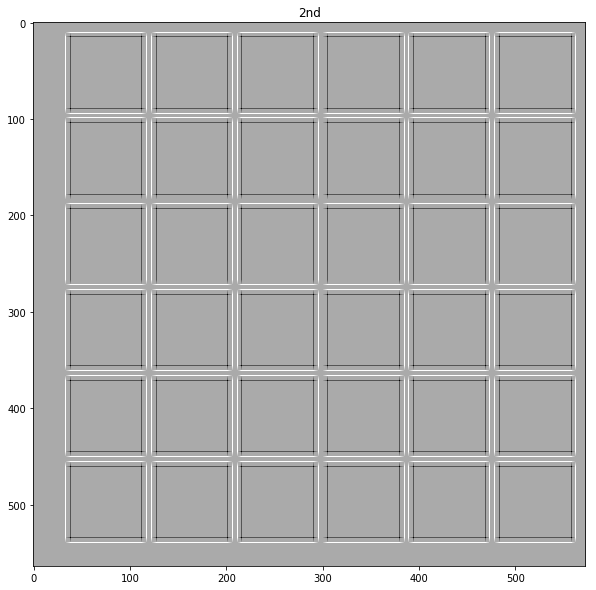

In [16]:
hout2 = convolve(hout1, h2)

# 微分＋ぼかし（１回目）
plt.figure(figsize=(10, 10))
plt.imshow(hout2, cmap='gray')
plt.title('2nd')

明るい部分と暗い部分が広がってきたのがわかるでしょうか？
さらに，局所積分形のぼかしフィルタをかけてみます．

Text(0.5,1,'3rd')

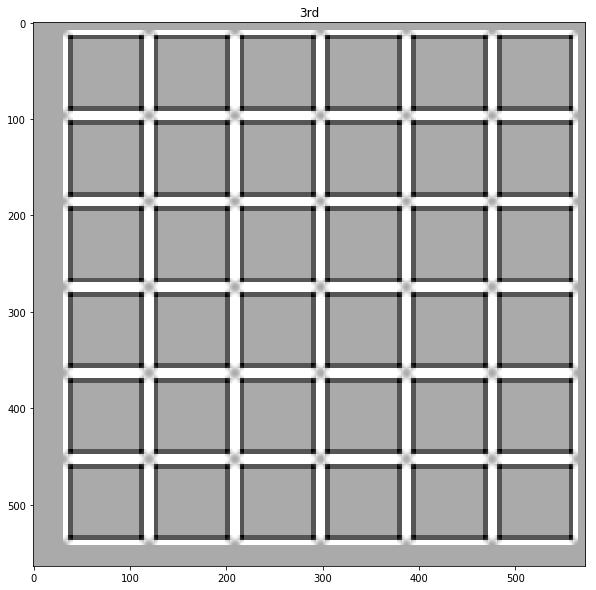

In [17]:
# 微分＋ぼかし（２回目）
hout3 = convolve(hout2, h2)
plt.figure(figsize=(10, 10))
plt.imshow(hout3, cmap='gray')
plt.title('3rd')

このように，通路と通路の交差点が周辺よりやや暗くなるような画像が得られるのがわかります．
側抑制とぼかしの効果で， Hermann 錯視は説明できることも多そうです．


実は，人間の視覚特性では，微分型のフィルタと積分形のフィルタによって得られた画像と割とよく似た特性を持ちます．
３時間目はこの特性を活かしたAIを作ってみることにしましょう

## おまけ（その１）

Image フォルダには以下の画像が含まれています．いわゆる標準画像と呼ばれる画像群（と作成した錯視画像）です．適宜フィルタをかけて遊んでみてください．

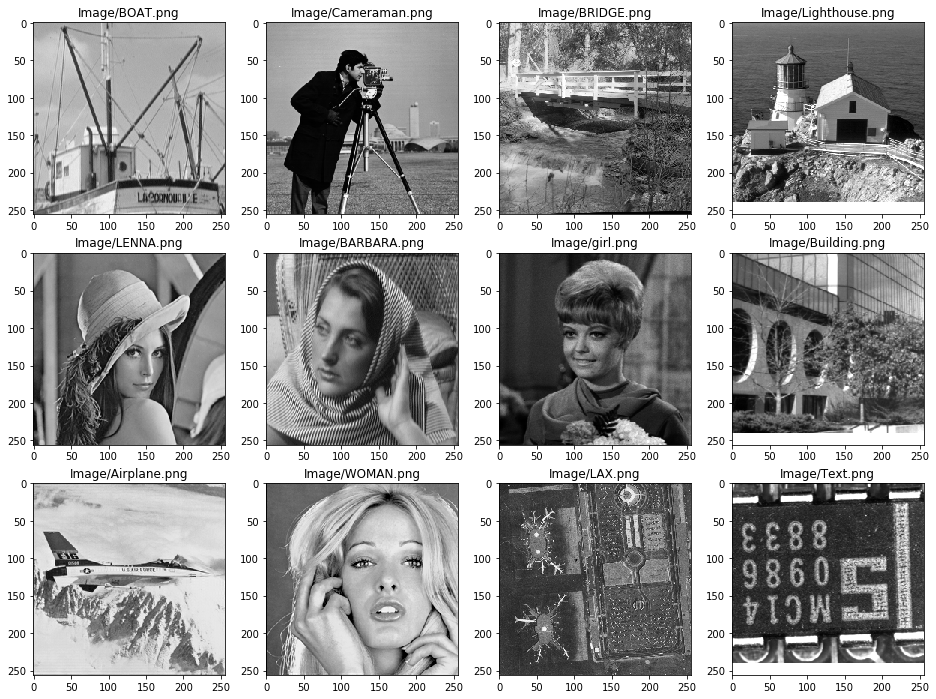

In [7]:
from pathlib import Path

current = Path()
imgdir = current / 'Image'

plt.figure(figsize=(16, 12))

for (i, p) in enumerate(imgdir.iterdir()):
    plt.subplot(3, 4, i+1)
    pname = str(p)
    img = plt.imread(pname)
    plt.imshow(img, cmap='gray')
    plt.title(pname)

# おまけ（その２）

０以下の値を切り取ったり，絶対値を取ったりするには以下のような操作を行います．

Text(0.5,1,'3rd + absolute value')

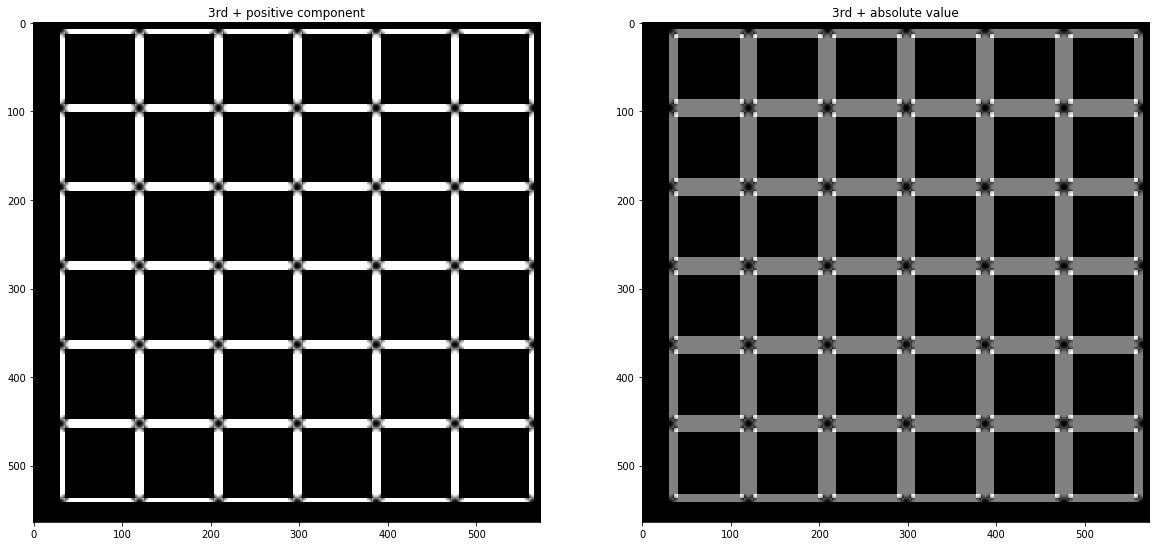

In [23]:
hout4 = hout3.copy()
hout4[hout4 < 0.0] = 0.0

plt.figure(figsize=(20, 40))
plt.subplot(1, 2, 1)
plt.imshow(hout4, cmap='gray')
plt.title('3rd + positive component')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(hout3), cmap='gray')
plt.title('3rd + absolute value')